<a href="https://colab.research.google.com/github/Pratham0181/Data-Science-and-AI-Projects/blob/main/Heart_Attack_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Updated URL for the dataset
# The original URL might have been changed or temporarily unavailable.
# The updated URL is for the 'processed.cleveland.data' file
# from the Heart Disease dataset.
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

# Added names for the columns as the original URL
# might not have headers
column_names = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach",
                "exang", "oldpeak", "slope", "ca", "thal", "target"]
data = pd.read_csv(url, names=column_names, na_values=['?'])

print(data.head())

    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  target  
0    3.0  0.0   6.0       0  
1    2.0  3.0   3.0       2  
2    2.0  2.0   7.0       1  
3    3.0  0.0   3.0       0  
4    1.0  0.0   3.0       0  


In [3]:
# Check for missing values
print(data.isnull().sum())

# Features (X) and Target (y)
X = data.drop('target', axis=1)  # 'target' is the column we want to predict
y = data['target']  # Heart disease (0: No, 1: Yes)

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64


In [4]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test)


##Visualize the Distribution of Key Variables##

Age Distribution for Patients with and without Heart Disease:

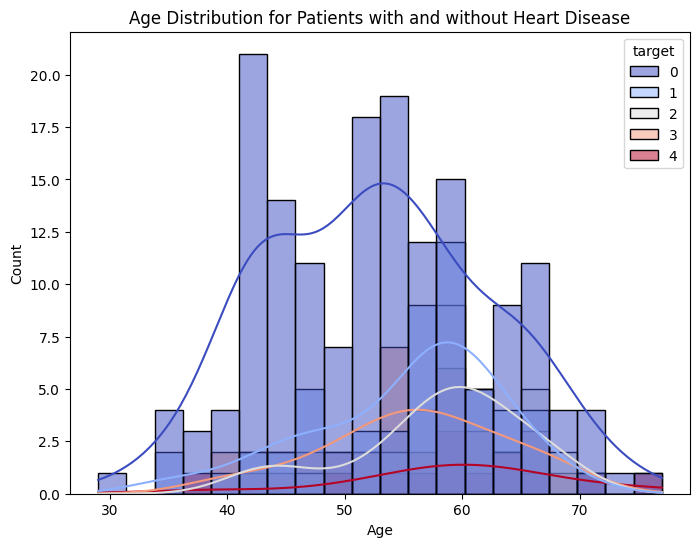

In [8]:
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='age', hue='target', kde=True, bins=20, palette='coolwarm')
plt.title('Age Distribution for Patients with and without Heart Disease')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


Cholesterol Levels vs Heart Disease:

<ipython-input-9-d60f0e462b82>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='target', y='chol', palette='coolwarm')


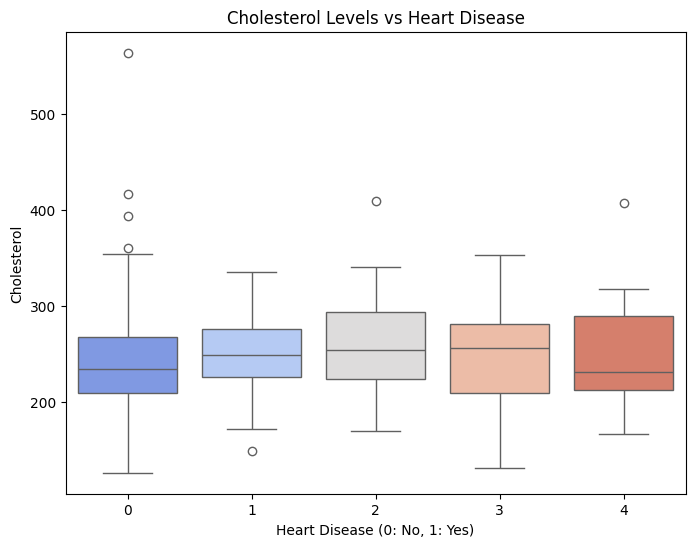

In [9]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='target', y='chol', palette='coolwarm')
plt.title('Cholesterol Levels vs Heart Disease')
plt.xlabel('Heart Disease (0: No, 1: Yes)')
plt.ylabel('Cholesterol')
plt.show()


Resting Blood Pressure Distribution:

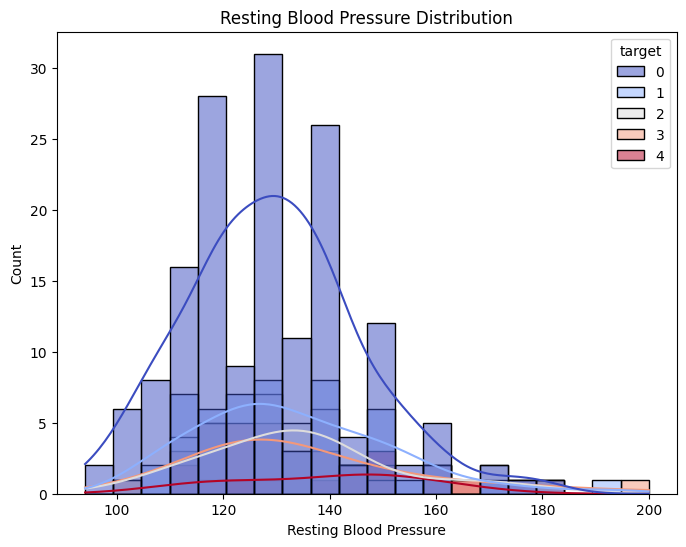

In [10]:
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='trestbps', hue='target', kde=True, bins=20, palette='coolwarm')
plt.title('Resting Blood Pressure Distribution')
plt.xlabel('Resting Blood Pressure')
plt.ylabel('Count')
plt.show()


##Visualize Relationships Between Variables##

 Pairplot: Age, Cholesterol, Resting Blood Pressure, and Target:

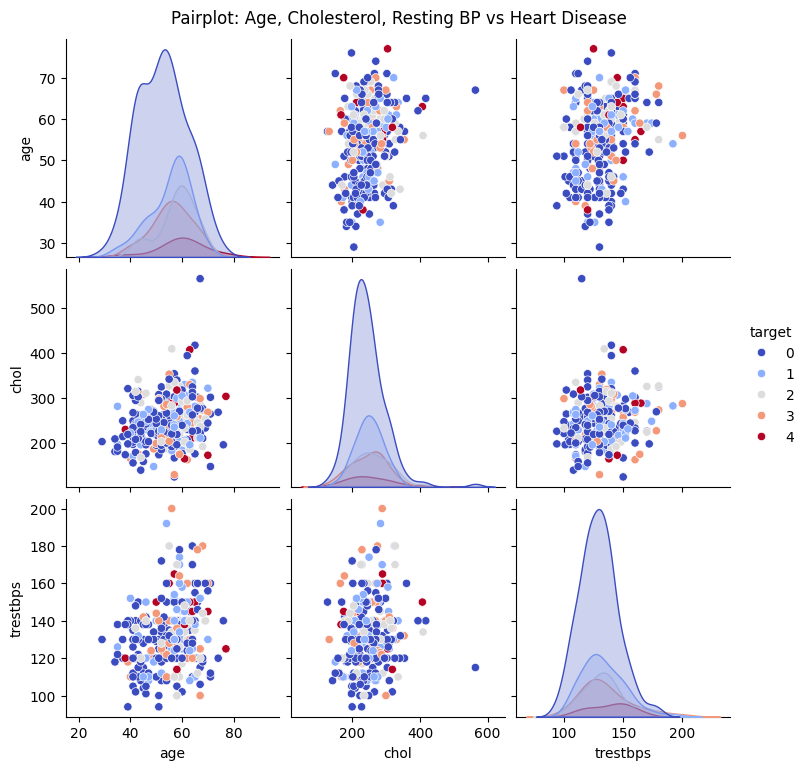

In [11]:
sns.pairplot(data[['age', 'chol', 'trestbps', 'target']], hue='target', palette='coolwarm')
plt.suptitle('Pairplot: Age, Cholesterol, Resting BP vs Heart Disease', y=1.02)
plt.show()


Correlation Heatmap Between Variables:

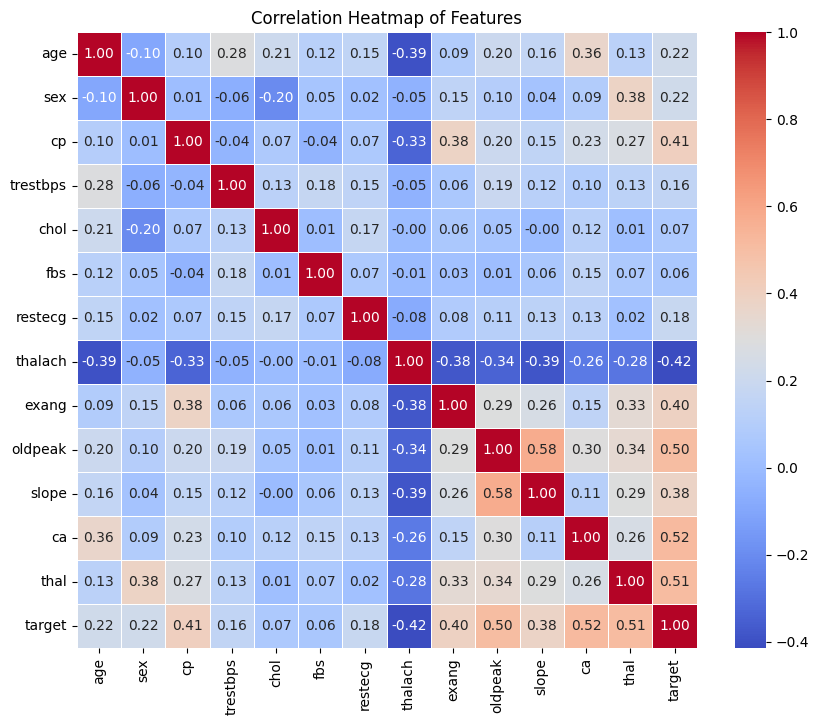

In [12]:
# Compute the correlation matrix
correlation_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()


##Visualize the Distribution of Various Continuous Variables by Heart Disease Status##

Violin Plot of Age Distribution by Heart Disease Status:

<ipython-input-13-4ee2361adc96>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x='target', y='age', palette='coolwarm')


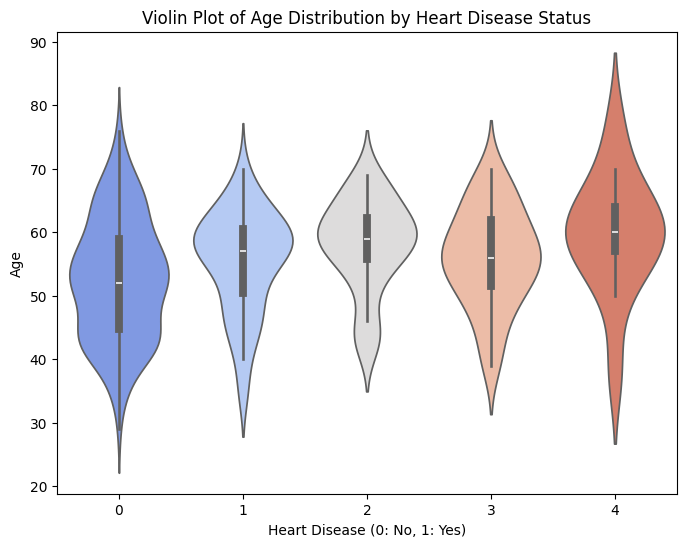

In [13]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=data, x='target', y='age', palette='coolwarm')
plt.title('Violin Plot of Age Distribution by Heart Disease Status')
plt.xlabel('Heart Disease (0: No, 1: Yes)')
plt.ylabel('Age')
plt.show()


Box Plot of Cholesterol by Heart Disease Status:

<ipython-input-15-38e6f6677cfa>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='target', y='chol', palette='coolwarm')


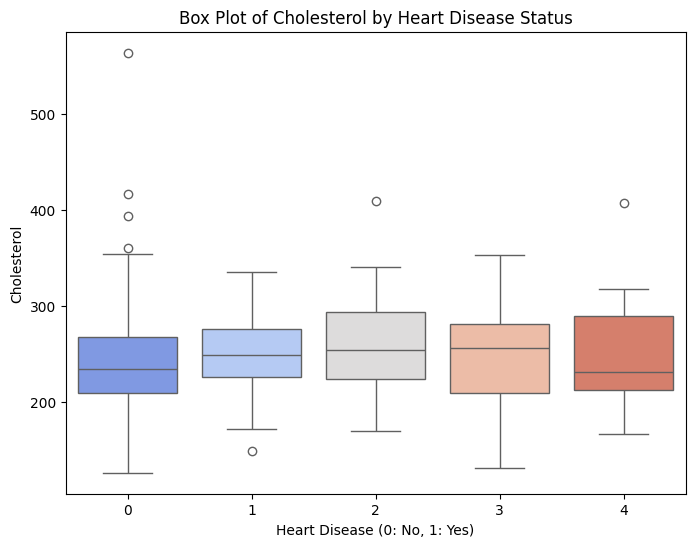

In [15]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='target', y='chol', palette='coolwarm')
plt.title('Box Plot of Cholesterol by Heart Disease Status')
plt.xlabel('Heart Disease (0: No, 1: Yes)')
plt.ylabel('Cholesterol')
plt.show()


Blood Pressure Distribution by Heart Disease Status:

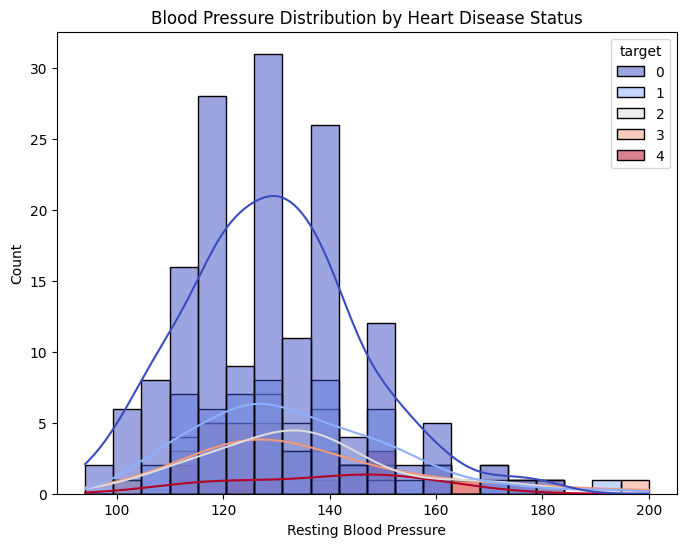

In [16]:
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='trestbps', hue='target', kde=True, bins=20, palette='coolwarm')
plt.title('Blood Pressure Distribution by Heart Disease Status')
plt.xlabel('Resting Blood Pressure')
plt.ylabel('Count')
plt.show()


##Trends Based on Categorical Variables##

Chest Pain Type vs Heart Disease:

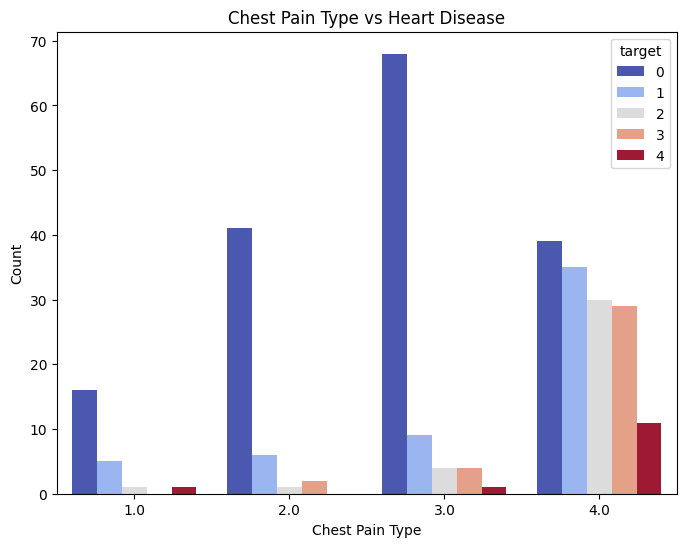

In [17]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='cp', hue='target', palette='coolwarm')
plt.title('Chest Pain Type vs Heart Disease')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.show()


Sex Distribution vs Heart Disease:

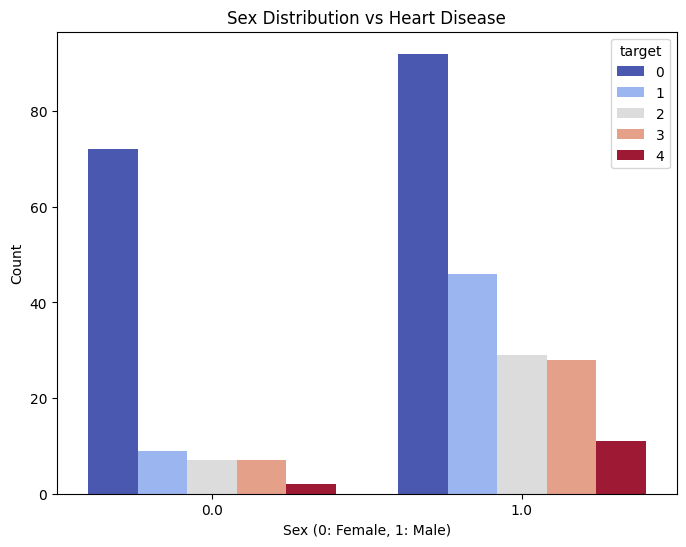

In [18]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='sex', hue='target', palette='coolwarm')
plt.title('Sex Distribution vs Heart Disease')
plt.xlabel('Sex (0: Female, 1: Male)')
plt.ylabel('Count')
plt.show()


##Evaluate the Model##

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.97      0.84        29
           1       0.08      0.08      0.08        12
           2       0.17      0.11      0.13         9
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         4

    accuracy                           0.49        61
   macro avg       0.20      0.23      0.21        61
weighted avg       0.39      0.49      0.43        61

Confusion Matrix:
[[28  0  1  0  0]
 [ 7  1  4  0  0]
 [ 3  2  1  3  0]
 [ 0  7  0  0  0]
 [ 0  2  0  2  0]]
Accuracy: 49.18%


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


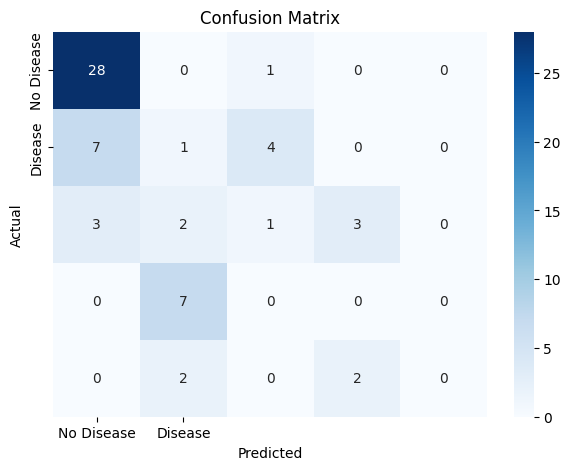

In [5]:
# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Plot Confusion Matrix
plt.figure(figsize=(7, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [14]:
# Feature importance
feature_importances = rf_model.feature_importances_
features = X.columns

# Create a DataFrame to display feature importance
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(importance_df)


     Feature  Importance
7    thalach    0.137247
9    oldpeak    0.123213
4       chol    0.111042
0        age    0.110292
3   trestbps    0.096083
11        ca    0.093836
2         cp    0.082617
12      thal    0.072639
10     slope    0.047381
8      exang    0.043603
1        sex    0.032070
6    restecg    0.029686
5        fbs    0.020290


In [20]:
# Precision, Recall, and F1-Score for class 1 (Heart Disease)
precision = precision_score(y_test, y_pred, average='weighted') # Change here
recall = recall_score(y_test, y_pred, average='weighted') # Change here
f1 = f1_score(y_test, y_pred, average='weighted') # Change here

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Precision: 0.39
Recall: 0.49
F1-Score: 0.43


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
